In [2]:
import pandas as pd

# df_train = pd.read_csv('data_train_with_artists.csv')
# df_test = pd.read_csv('data_test_with_artists.csv')
df_train = pd.read_csv('./datasets/data_train.csv')
df_test = pd.read_csv('./datasets/data_test.csv')

In [3]:
df_train.head()

,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Length,Acousticness,Speechiness,Popularity,genre_0,genre_1,genre_2,genre_3,genre_4,genre_5,genre_6,genre_7
0,2012,136,78,45,-4,67,24,187,11,6,73,0,0,1,0,0,0,0,0
1,1971,134,32,28,-17,11,14,1412,37,4,58,1,0,0,0,0,0,0,0
2,2007,93,93,44,-3,8,40,203,1,5,62,0,0,0,0,0,1,0,0
3,2014,93,48,74,-9,11,36,285,3,4,73,0,1,0,0,0,0,0,0
4,2004,117,75,61,-9,39,97,394,1,3,49,0,0,0,0,1,0,0,0


In [4]:
x_train = df_train.drop(columns=['Year'])
y_train = df_train['Year']

x_test = df_test.drop(columns=['Year'])
y_test = df_test['Year']

### PCA
<span style="color:orange">ES POT IGNORAR, ERA NOMES PER PROVAR</span>

In [6]:
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import StandardScaler

In [4]:
data_columns = x_train.columns
x_train_scaled = x_train.copy()
x_train_scaled[data_columns] = StandardScaler().fit_transform(x_train[data_columns])
x_train_scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
BPM,1395.0,-1.196972e-16,1.000359,-3.020629,-0.763171,-0.046518,0.526804,2.999258
Energy,1395.0,9.932318e-17,1.000359,-2.502002,-0.771451,0.093824,0.822477,1.824374
Danceability,1395.0,1.311575e-16,1.000359,-2.865320,-0.685865,0.040621,0.701062,2.814473
Loudness,1395.0,2.215671e-16,1.000359,-4.979887,-0.555787,0.273731,0.826744,1.932769
Liveness,1395.0,-6.239533e-17,1.000359,-1.011217,-0.601213,-0.425497,0.248081,4.611693
Valence,1395.0,-2.546748e-17,1.000359,-1.900599,-0.848546,-0.079738,0.810461,1.983905
Length,1395.0,1.782724e-17,1.000359,-1.628165,-0.523203,-0.181669,0.260316,11.530932
Acousticness,1395.0,1.273374e-18,1.000359,-1.002900,-0.863076,-0.373691,0.709946,2.422791
Speechiness,1395.0,7.703913e-17,1.000359,-0.674607,-0.450754,-0.226902,-0.003049,11.189585
Popularity,1395.0,-2.062866e-16,1.000359,-3.399432,-0.679996,0.156753,0.784315,2.667001


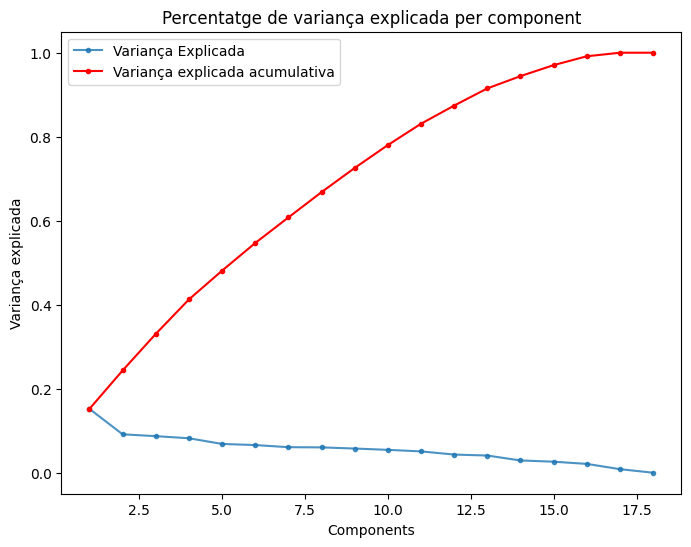

In [5]:
pca = PCA().fit(x_train_scaled[data_columns])

fig = plt.figure(figsize=(8,6));
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),pca.explained_variance_ratio_ ,alpha=0.8,marker='.',label="Variança Explicada");
y_label = plt.ylabel('Variança explicada');
x_label = plt.xlabel('Components');
plt.plot(range(1,len(pca.explained_variance_ratio_ )+1),
         np.cumsum(pca.explained_variance_ratio_),
         c='red',marker='.',
         label="Variança explicada acumulativa");
plt.legend();
plt.title('Percentatge de variança explicada per component');

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_train = pd.DataFrame(scaler.fit_transform(x_train))
x_test = pd.DataFrame(scaler.transform(x_test))

x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
0,1395.0,0.501775,0.166176,0.0,0.375000,0.494048,0.589286,1.0
1,1395.0,0.578314,0.231223,0.0,0.400000,0.600000,0.768421,1.0
2,1395.0,0.504476,0.176126,0.0,0.383721,0.511628,0.627907,1.0
3,1395.0,0.720401,0.144714,0.0,0.640000,0.760000,0.840000,1.0
4,1395.0,0.179839,0.177908,0.0,0.072917,0.104167,0.223958,1.0
5,1395.0,0.489277,0.257525,0.0,0.270833,0.468750,0.697917,1.0
6,1395.0,0.123729,0.076020,0.0,0.083969,0.109924,0.143511,1.0
7,1395.0,0.292758,0.292017,0.0,0.040816,0.183673,0.500000,1.0
8,1395.0,0.056861,0.084317,0.0,0.018868,0.037736,0.056604,1.0
9,1395.0,0.560367,0.164901,0.0,0.448276,0.586207,0.689655,1.0


# Models lineals
### Linear Regression

In [10]:
from math import sqrt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


lr = LinearRegression().fit(x_train, y_train)
y_test_predicted_linear = lr.predict(x_test)
r2_lr_train = np.mean(cross_val_score(lr, x_train, y_train))
r2_lr_test = np.mean(cross_val_score(lr, x_test, y_test))

print(f'Train R2 score: {r2_lr_train}')
print(f'Test R2 score: {r2_lr_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_linear))))

Train R2 score: 0.3971511184460519
Test R2 score: 0.35197732146058297
Mitjana d'anys d'error: 12.786822879960974


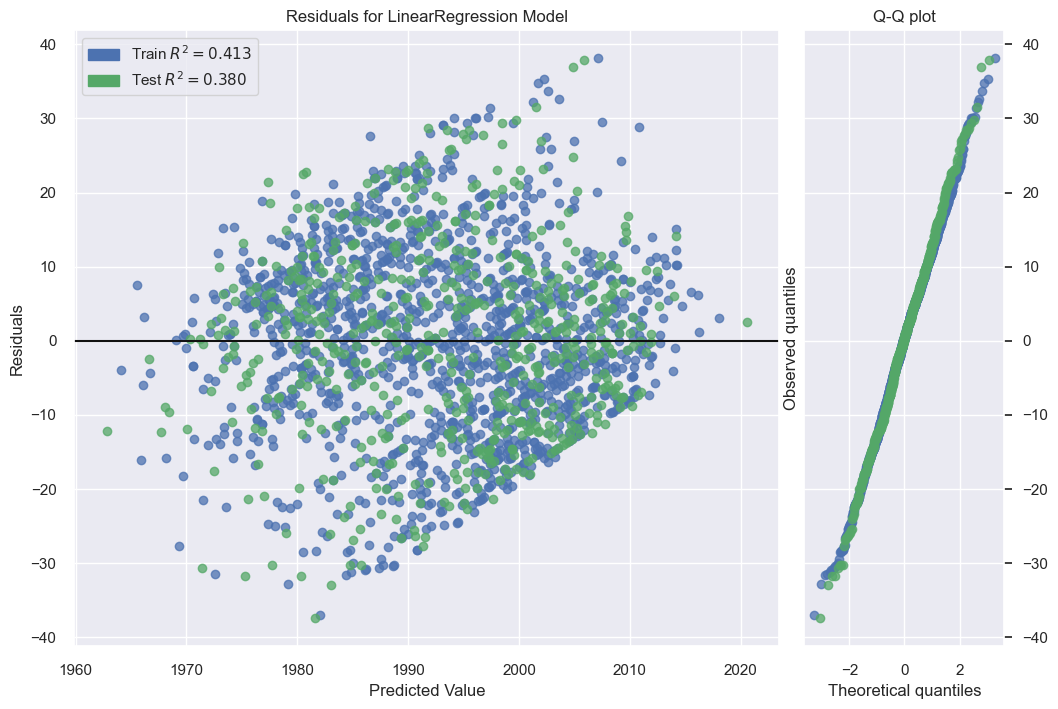

In [11]:
from yellowbrick.regressor import residuals_plot
import seaborn as sns

sns.set()
plt.figure(figsize=(12,8));
viz = residuals_plot(lr, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

/Users/julia/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/julia/Library/Python/3.11/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


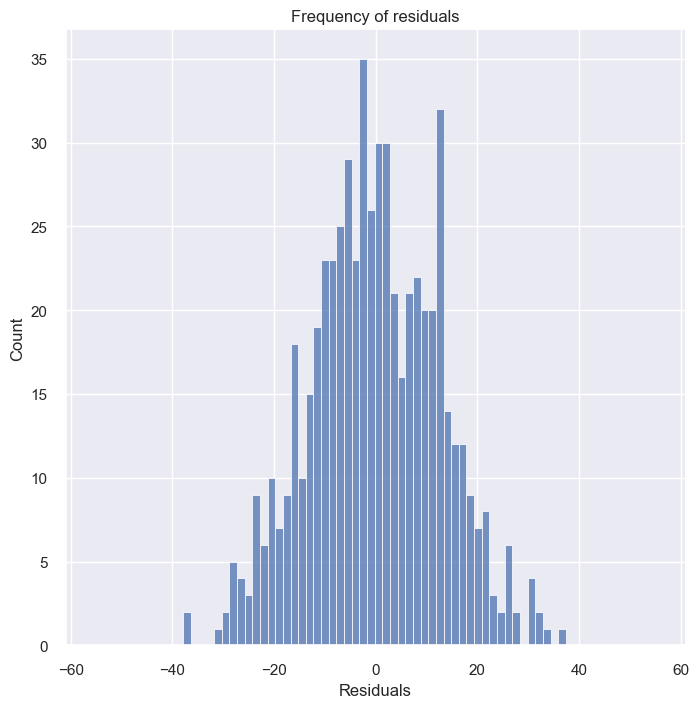

In [13]:
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlim([min(y_train)-max(y_train), max(y_train)-min(y_train)])
ax.set_title('Frequency of residuals')
ax.set_xlabel('Residuals (years)')
sns.histplot(y_test-y_test_predicted_linear, bins=50);

### Ridge

In [10]:
from sklearn.linear_model import RidgeCV


lambdas = [1e-4, 1e-3, 1e-2, 0.1, 0.5, 1, 5, 10, 50, 100]

ridge_cv = RidgeCV(alphas=lambdas, cv=5).fit(x_train, y_train)
y_test_predicted_ridge = ridge_cv.predict(x_test)
r2_ridge_train = np.mean(cross_val_score(ridge_cv, x_train, y_train))
r2_ridge_test = np.mean(cross_val_score(ridge_cv, x_test, y_test))

print(f'Best lambda: {ridge_cv.alpha_}')
print(f'Train R2 score: {r2_ridge_train}')
print(f'Test R2 score: {r2_ridge_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_ridge))))

Best lambda: 0.5
Train R2 score: 0.3973912583536793
Test R2 score: 0.35471164346764206
Mitjana d'anys d'error: 12.784308805907546


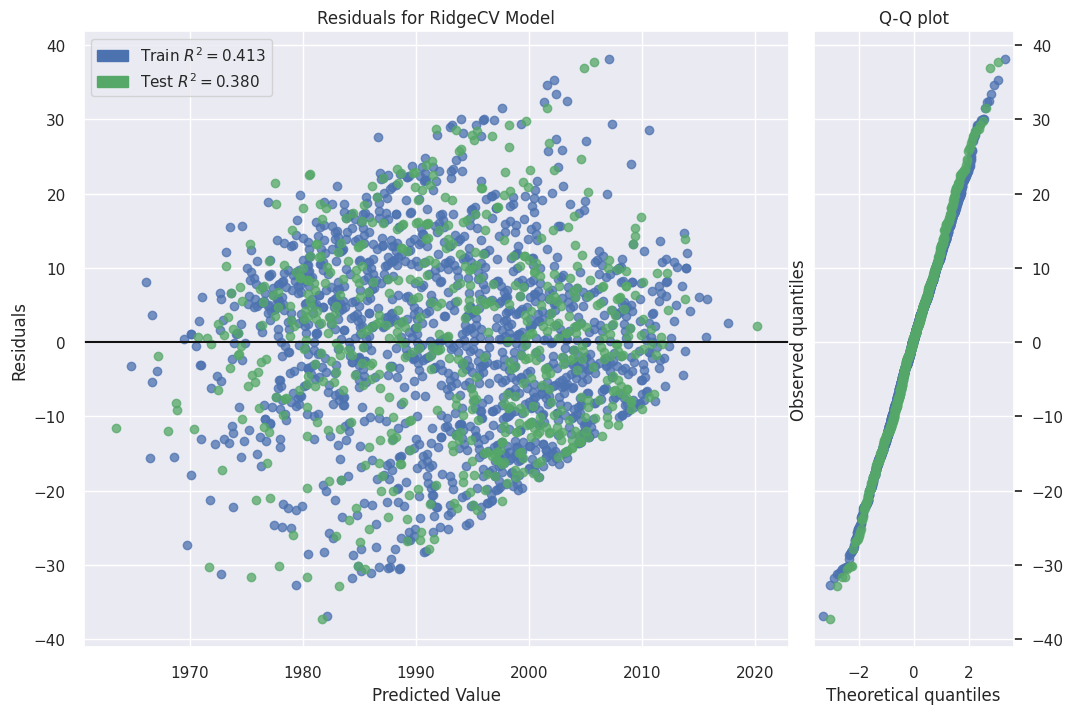

In [15]:
plt.figure(figsize=(12,8));
viz = residuals_plot(ridge_cv, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### LASSO

In [11]:
from sklearn.linear_model import LassoCV


lasso_cv = LassoCV(alphas=lambdas, cv=5).fit(x_train, y_train)
y_test_predicted_lasso = lasso_cv.predict(x_test)
r2_lasso_train = np.mean(cross_val_score(lasso_cv, x_train, y_train))
r2_lasso_test = np.mean(cross_val_score(lasso_cv, x_test, y_test))

print(f'Best lambda: {ridge_cv.alpha_}')
print(f'Train R2 score: {r2_lasso_train}')
print(f'Test R2 score: {r2_lasso_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_lasso))))

Best lambda: 0.5
Train R2 score: 0.39687408865210205
Test R2 score: 0.3538238347889888
Mitjana d'anys d'error: 12.782918687093009


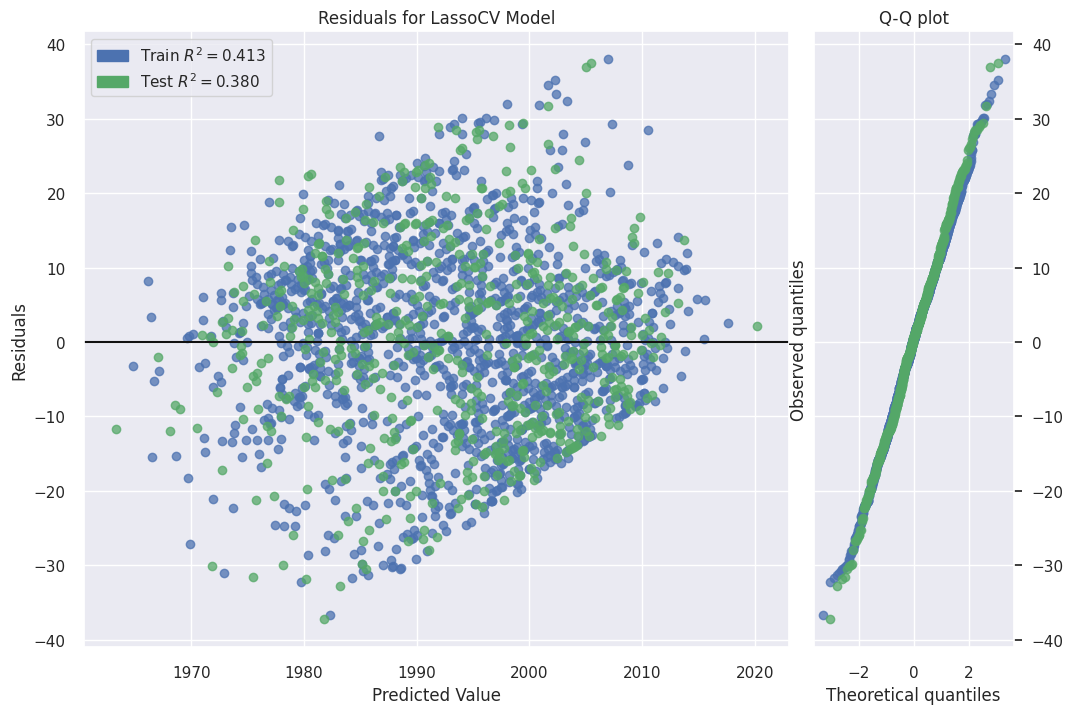

In [16]:
plt.figure(figsize=(12,8));
viz = residuals_plot(lasso_cv, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### KNN
<span style="color:orange">De moment fa un overfitting de la parra (o algo similar al grafic de residus idk)</span>

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from skopt import BayesSearchCV


param = {'n_neighbors':[1, 3, 5, 7, 11, 15, 20, 25], 
         'weights':['distance', 'uniform'], 
         'leaf_size':[1, 5, 10, 15, 20, 25, 30],
         'metric': ['l2', 'l1', 'cosine']}
niter = 15
cv = 5

knn = BayesSearchCV(KNeighborsRegressor(), param, n_iter=niter, 
                        cv=cv,
                        n_jobs=-1, 
                        refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_knn = knn.predict(x_test)
r2_knn_train = np.mean(cross_val_score(knn, x_train, y_train))
r2_knn_test = np.mean(cross_val_score(knn, x_test, y_test))

print(f'Train R2 score: {r2_knn_train}')
print(f'Test R2 score: {r2_knn_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_knn))))

Train R2 score: 0.38503385211654495
Test R2 score: 0.32311088280784933
Mitjana d'anys d'error: 12.654902393829142


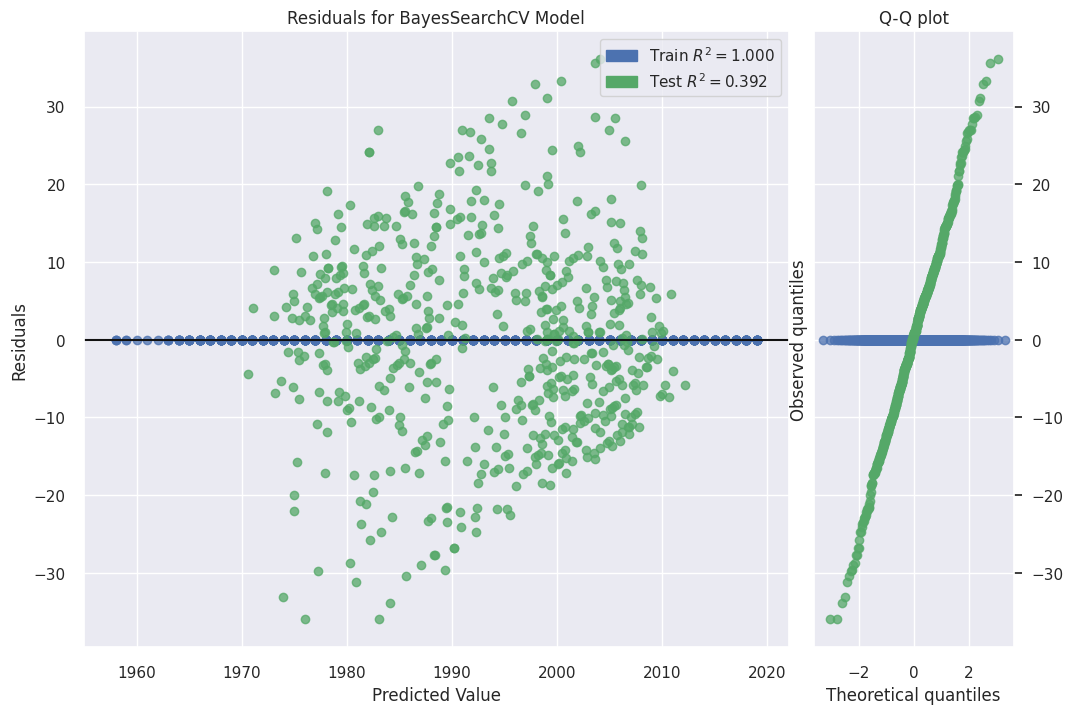

In [44]:
plt.figure(figsize=(12,8));
viz = residuals_plot(knn, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### SVM Lineal

In [27]:
import warnings
from sklearn.svm import SVR
warnings.filterwarnings('ignore')


param = {'C':10**np.linspace(-3,3,101), 'epsilon':np.linspace(0,0.01,11)}

lsvr = SVR(kernel='linear')
lsvm = BayesSearchCV(lsvr, param, n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_lsvm = lsvm.predict(x_test)
r2_lsvm_train = np.mean(cross_val_score(lsvm, x_train, y_train))
r2_lsvm_test = np.mean(cross_val_score(lsvm, x_test, y_test))

print(f'Train R2 score: {r2_lsvm_train}')
print(f'Test R2 score: {r2_lsvm_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_lsvm))))

Train R2 score: 0.3824404847493384
Test R2 score: 0.320222909241106
Mitjana d'anys d'error: 13.036630485770578


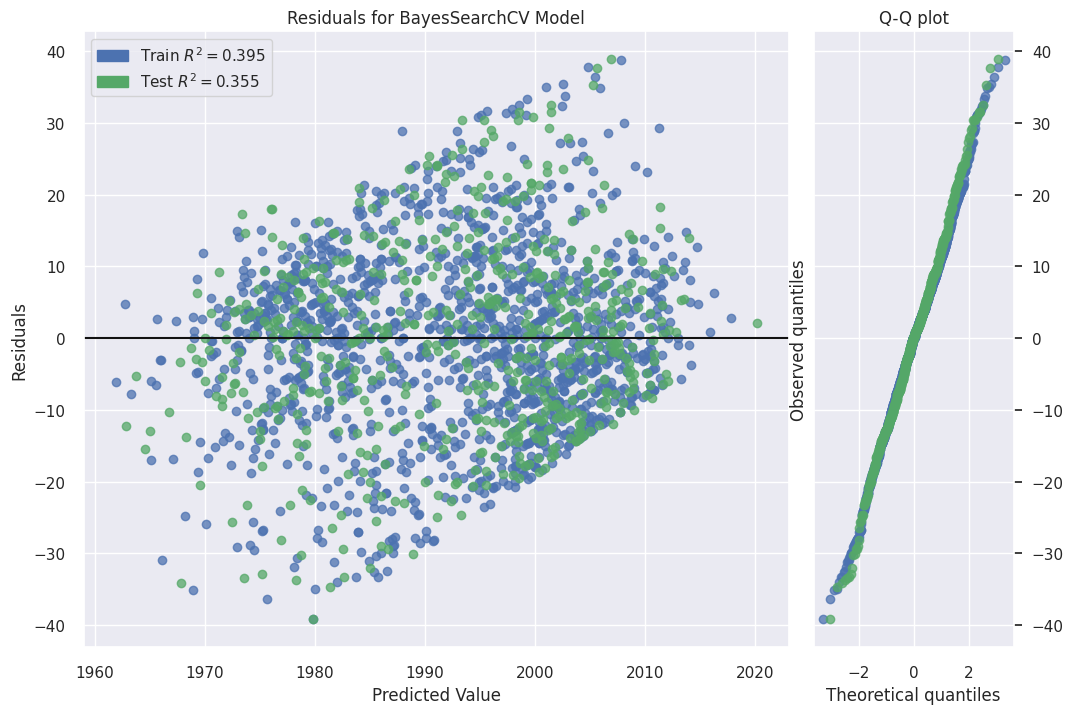

In [28]:
plt.figure(figsize=(12,8));
viz = residuals_plot(lsvm, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### SVM Quadràtic

In [29]:
param = {'C':10**np.linspace(-3,3,101), 'epsilon':np.linspace(0,0.01,11)}

qsvr = SVR(kernel='poly', degree=2)
qsvm = BayesSearchCV(qsvr, param, n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_qsvm = qsvm.predict(x_test)
r2_qsvm_train = np.mean(cross_val_score(qsvm, x_train, y_train))
r2_qsvm_test = np.mean(cross_val_score(qsvm, x_test, y_test))

print(f'Train R2 score: {r2_qsvm_train}')
print(f'Test R2 score: {r2_qsvm_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_qsvm))))

Train R2 score: 0.40970272314569733
Test R2 score: 0.3574856281974064
Mitjana d'anys d'error: 12.52463946997923


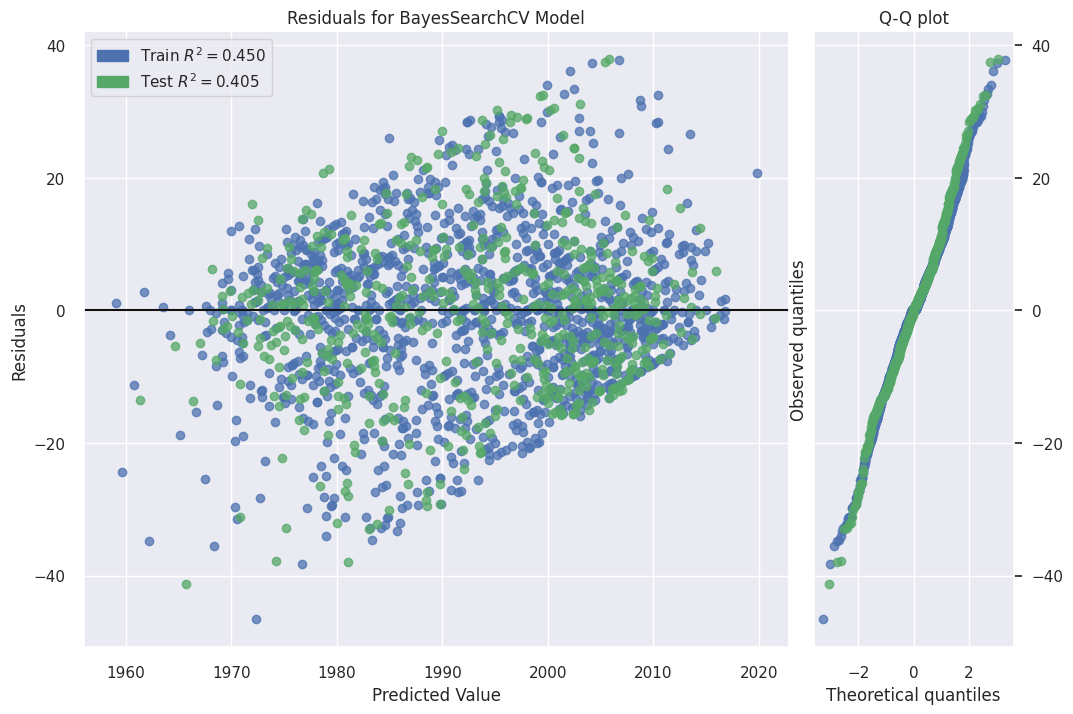

In [30]:
plt.figure(figsize=(12,8));
viz = residuals_plot(qsvm, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### SVM RBF

In [36]:
param = {'C':10**np.linspace(-3,3,101), 'gamma':['scale','auto'], 'epsilon':np.linspace(0,0.01,11)}

rbfsvr = SVR(kernel='rbf')
rbfsvm = BayesSearchCV(rbfsvr, param, n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_rbfsvm = rbfsvm.predict(x_test)
r2_rbfsvm_train = np.mean(cross_val_score(rbfsvm, x_train, y_train))
r2_rbfsvm_test = np.mean(cross_val_score(rbfsvm, x_test, y_test))

print(f'Train R2 score: {r2_rbfsvm_train}')
print(f'Test R2 score: {r2_rbfsvm_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_rbfsvm))))

Train R2 score: 0.4097415942815593
Test R2 score: 0.37547536799503983
Mitjana d'anys d'error: 12.443692778026907


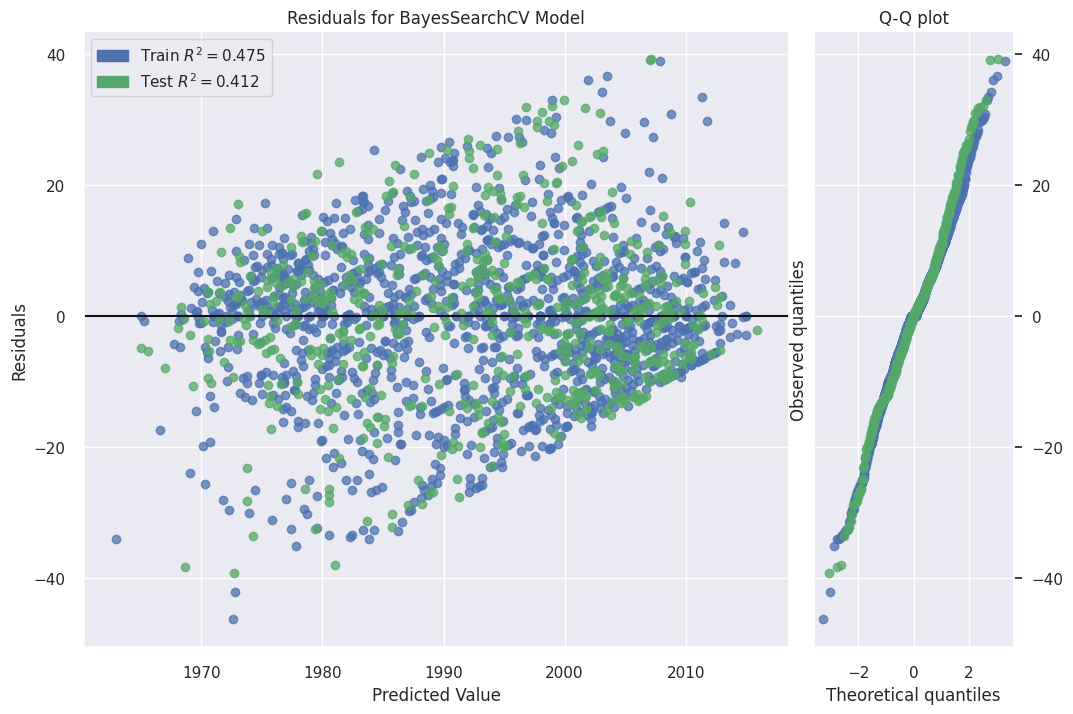

In [46]:
plt.figure(figsize=(12,8));
viz = residuals_plot(rbfsvm, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);

### Random Forest

In [39]:
from sklearn.ensemble import RandomForestRegressor


param = {'n_estimators': [5,10,25,40, 50, 75,100, 200], 
         'criterion':['squared_error', 'poisson'], 
         'max_depth':[None, 1, 2, 3,  5,  8, 9,10,15],
         'min_samples_leaf':[1,2,3,5,10]}

rforest = BayesSearchCV(RandomForestRegressor(), param, n_iter=niter, cv=cv, n_jobs=-1, refit=True, random_state=0).fit(x_train, y_train)
y_test_predicted_rforest = rforest.predict(x_test)
r2_rforest_train = np.mean(cross_val_score(rforest, x_train, y_train))
r2_rforest_test = np.mean(cross_val_score(rforest, x_test, y_test))

print(f'Train R2 score: {r2_rforest_train}')
print(f'Test R2 score: {r2_rforest_test}')
print("Mitjana d'anys d'error: {}".format(sqrt(mean_squared_error(y_test, y_test_predicted_rforest))))

Train R2 score: 0.43228183895733874
Test R2 score: 0.4150994292968863
Mitjana d'anys d'error: 12.036494641779447


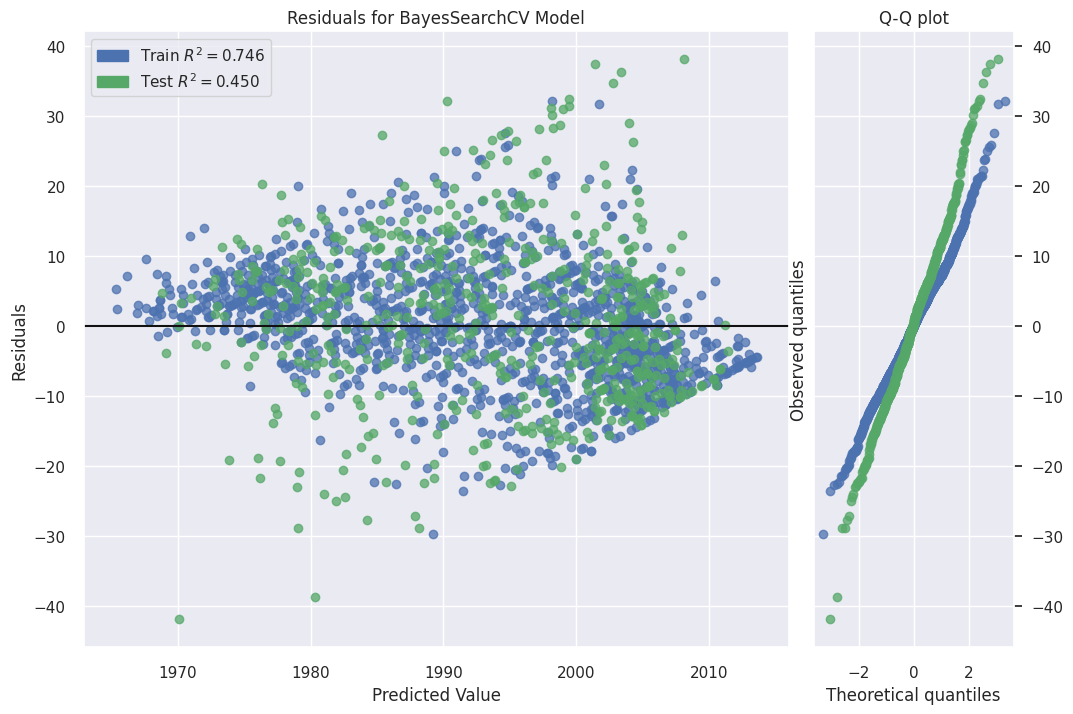

In [40]:
plt.figure(figsize=(12,8));
viz = residuals_plot(rforest, x_train, y_train, x_test, y_test, is_fitted=True, qqplot=True, hist=False);